In [1]:
import numpy as np
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import boston_housing
import matplotlib.pyplot as plt

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
print(train_data.shape)
print(test_data.shape)
print(test_targets)

(404, 13)
(102, 13)
[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 10.2 24.3 43.1 17.6 15.4
 16.2 27.1 21.4 21.5 22.4 25.  16.6 18.6 22.  42.8 35.1 21.5 36.  21.9
 24.1 50.  26.7 25. ]


In [2]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [3]:
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae', 'accuracy'])
    return model

processing fold # 0
Epoch 1/200


/Users/fmashirin/School/PIIS/venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


303/303 ━━━━━━━━━━━━━━━━━━━━ 1s 489us/step - accuracy: 0.0000e+00 - loss: 295.0981 - mae: 14.8125
Epoch 2/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.0000e+00 - loss: 23.3211 - mae: 3.6434
Epoch 3/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.0000e+00 - loss: 20.3986 - mae: 2.9632
Epoch 4/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - accuracy: 0.0000e+00 - loss: 29.2609 - mae: 3.0669
Epoch 5/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.0000e+00 - loss: 16.3475 - mae: 2.7661
Epoch 6/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.0000e+00 - loss: 15.3840 - mae: 2.6443
Epoch 7/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.0000e+00 - loss: 11.5652 - mae: 2.4583
Epoch 8/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 540us/step - accuracy: 0.0000e+00 - loss: 14.3731 - mae: 2.6272
Epoch 9/200
303/303 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.0000e+00 - loss: 10.8304 - mae: 2.3259
Epoch 10/200
303/303 ━━━━━━━━━━━━━━━━━

ValueError: too many values to unpack (expected 2)

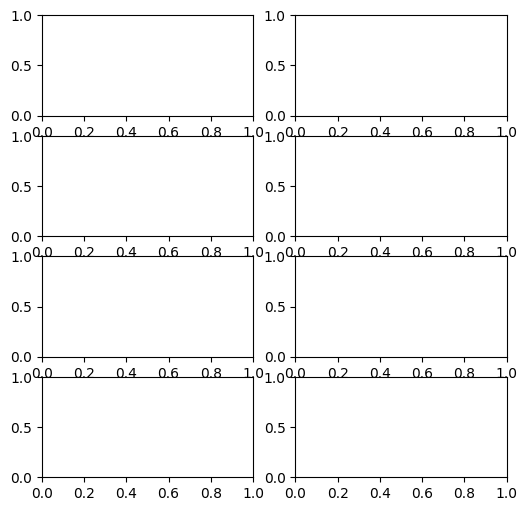

In [4]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 200
all_scores = []

fig, axs = plt.subplots(k, 2, figsize=(6, 6))
axs = axs.ravel()

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i *num_val_samples], train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) *num_val_samples:]], axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1)
    print(val_data, val_targets)
    val_mse,val_mae = model.evaluate(val_data, val_targets)
    all_scores.append(val_mae)
    axs[i].plot(history.history['loss'][10:], label=f'#{i+1} model Loss', color='red')
    axs[i].set_xlabel('Epoch')
    axs[i].legend()
    axs[i+k].plot(history.history['mae'][10:], label=f'#{i+1} model mae', color='green')
    axs[i+k].set_xlabel('Epoch')
    axs[i+k].legend()
print(np.mean(all_scores))
plt.show()

In [ ]:
plt.plot(all_scores)

processing fold # 0


ValueError: too many values to unpack (expected 2)

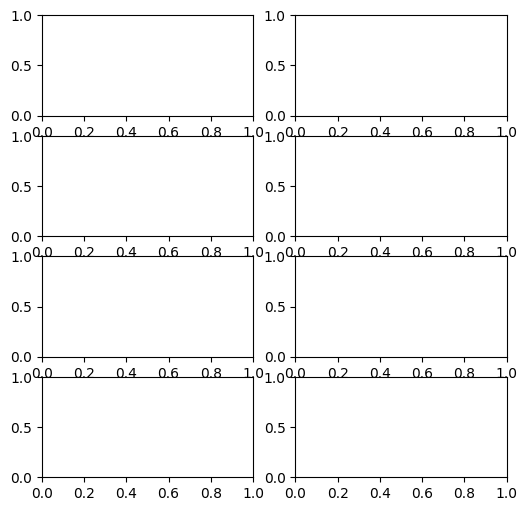

In [18]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

fig, axs = plt.subplots(k, 2, figsize=(6, 6))
axs = axs.ravel()

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i *num_val_samples], train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) *num_val_samples:]], axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse,val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    axs[i].plot(history.history['loss'], label=f'#{i+1} model Loss', color='red')
    axs[i].set_xlabel('Epoch')
    axs[i].legend()
    axs[i+k].plot(history.history['mae'], label=f'#{i+1} model Mae', color='green')
    axs[i+k].set_xlabel('Epoch')
    axs[i+k].legend()
print(np.mean(all_scores))
plt.show()

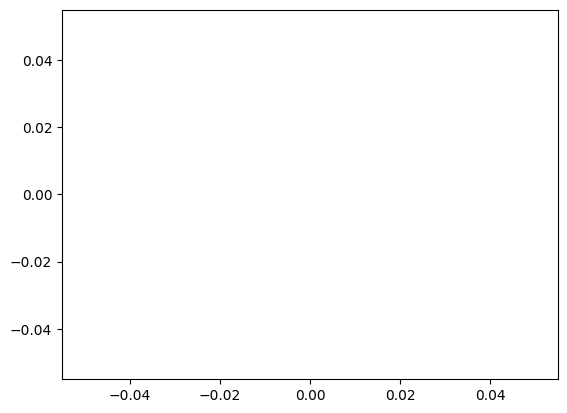

In [14]:
plt.plot(all_scores)

In [ ]:
k = 5
num_val_samples = len(train_data) // k
num_epochs = 50
all_scores = []

fig, axs = plt.subplots(k, 2, figsize=(6, 6))
axs = axs.ravel()

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i *num_val_samples], train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) *num_val_samples:]], axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse,val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    axs[i].plot(history.history['loss'], label=f'#{i+1} model Loss', color='red')
    axs[i].set_xlabel('Epoch')
    axs[i].legend()
    axs[i+k].plot(history.history['mae'], label=f'#{i+1} model Mae', color='green')
    axs[i+k].set_xlabel('Epoch')
    axs[i+k].legend()
print(np.mean(all_scores))
plt.show()

In [ ]:
plt.plot(all_scores)

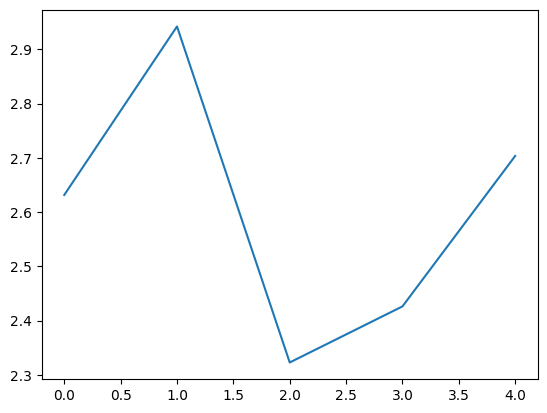

In [14]:
plt.plot(all_scores)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
2.5017600059509277


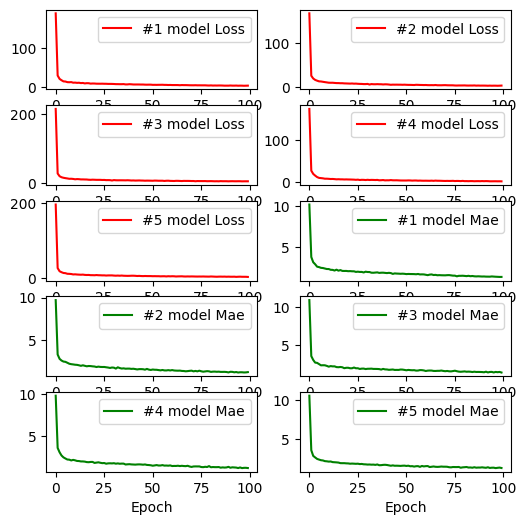

In [17]:
k = 5
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

fig, axs = plt.subplots(k, 2, figsize=(6, 6))
axs = axs.ravel()

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i *num_val_samples], train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) *num_val_samples:]], axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse,val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    axs[i].plot(history.history['loss'], label=f'#{i+1} model Loss', color='red')
    axs[i].set_xlabel('Epoch')
    axs[i].legend()
    axs[i+k].plot(history.history['mae'], label=f'#{i+1} model Mae', color='green')
    axs[i+k].set_xlabel('Epoch')
    axs[i+k].legend()
print(np.mean(all_scores))
plt.show()

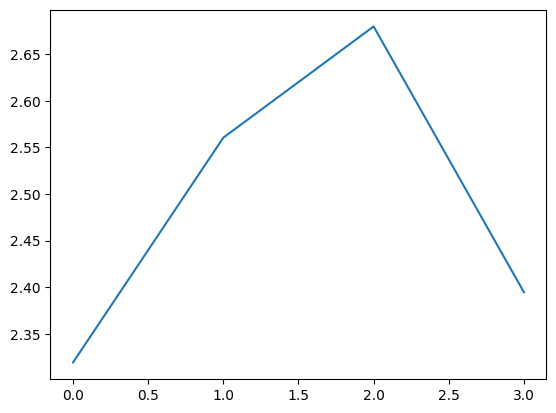

In [16]:
plt.plot(all_scores)